In [ ]:
#Nama    : Alif Aqila Hakim
#GDSC ID : 23100110000181
#Project : Memprediksi nilai Hardness (Kesadahan Air) berdasarkan feature 
#          alkalinitas dan unsur kimia lainnya

1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data latihan dan tes
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [2]:
# Memeriksa struktur data latih
print(train.head())

   id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
0   0              120.0     24.0       6.9     0.314        7.1   
1   1              140.0     41.0      11.0     0.150        6.5   
2   2              160.0     51.0       9.0     0.450        9.1   
3   3               46.0     13.0       2.9     0.120        2.7   
4   4              240.0    147.0      70.0     0.600       48.0   

   Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
0         0.498    48.0                  510.0     23.2   
1         0.950    19.0                  300.0      8.5   
2         2.500    12.0                  370.0     25.0   
3         0.430     6.4                  110.0      5.0   
4         6.800    93.0                 1410.0    418.0   

   Total Dissolved Solids  Hardness  
0                   240.0      90.4  
1                   190.0     130.0  
2                   230.0     160.0  
3                    97.0      41.0  
4                   950.0     586.0  


In [3]:
# Memeriksa struktur data tes
print(test.head())

     id  Alkalinity, total  Calcium  Chloride  Fluoride  Magnesium  \
0  6400               93.0     15.9       3.6     0.100       11.9   
1  6401              180.0     34.0     200.0     1.900        8.2   
2  6402               95.0     44.0      35.0     0.081        3.3   
3  6403              110.0     29.0      12.0     0.250        6.0   
4  6404              179.0     59.0      51.7     0.160       45.0   

   Nitrate as N  Sodium  Specific Conductivity  Sulfate  \
0          1.40    12.7                  208.0      6.5   
1          1.30   300.0                 1700.0    210.0   
2          1.10    28.0                  390.0     22.0   
3          0.15    23.0                  283.0     15.0   
4          4.10    64.0                  976.0    170.0   

   Total Dissolved Solids  
0                   156.0  
1                   860.0  
2                   240.0  
3                   190.0  
4                   430.0  


In [4]:
# Memeriksa informasi data latih
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [5]:
# Memeriksa informasi data tes
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1601 non-null   int64  
 1   Alkalinity, total       1601 non-null   float64
 2   Calcium                 1601 non-null   float64
 3   Chloride                1601 non-null   float64
 4   Fluoride                1601 non-null   float64
 5   Magnesium               1601 non-null   float64
 6   Nitrate as N            1601 non-null   float64
 7   Sodium                  1601 non-null   float64
 8   Specific Conductivity   1601 non-null   float64
 9   Sulfate                 1601 non-null   float64
 10  Total Dissolved Solids  1601 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 137.7 KB


In [6]:
# Memeriksa nilai yang hilang untuk data latih
print(train.isnull().sum())

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64


In [7]:
# Memeriksa nilai yang hilang untuk data tes
print(test.isnull().sum())

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
dtype: int64


In [8]:
# Analisis statistik deskriptif (train)
train.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


In [9]:
# Analisis statistik deskriptif (test)
test.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


2. Exploratory Data Analysis

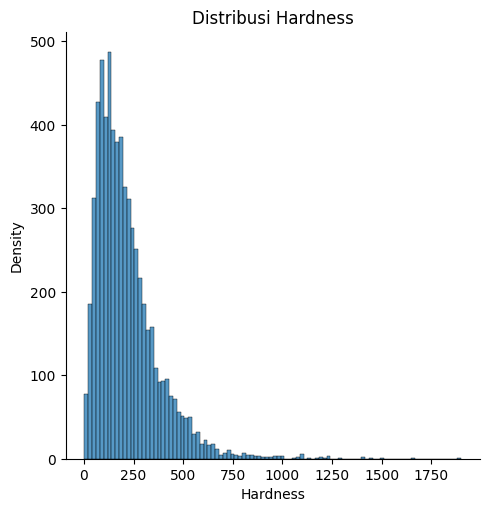

In [10]:
# Distribusi target variabel (Hardness)
sns.displot(train['Hardness'])
plt.xlabel('Hardness')
plt.ylabel('Density')
plt.title('Distribusi Hardness')
plt.show()


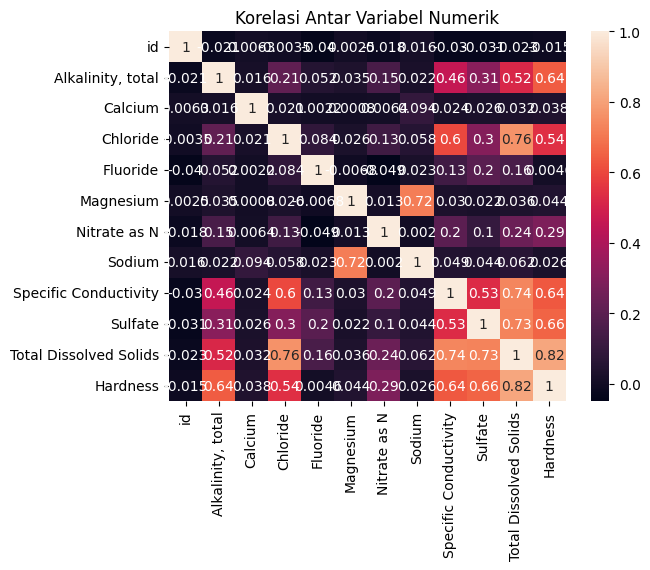

In [11]:
# Hubungan antar variabel numerik 
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


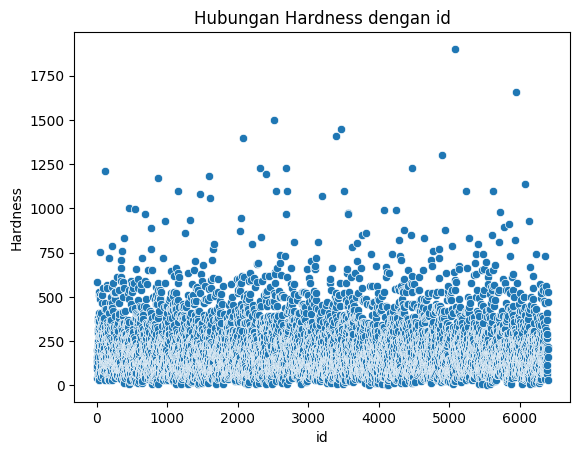

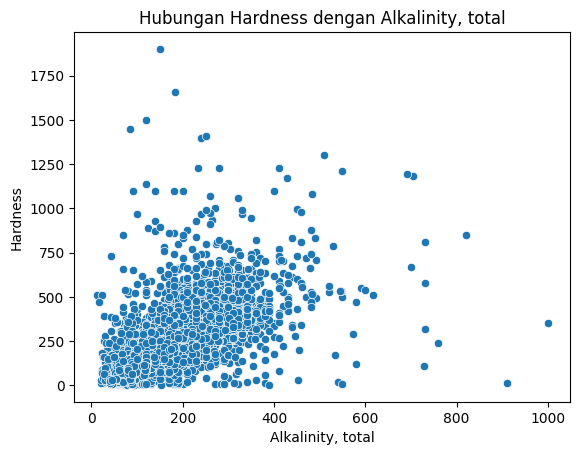

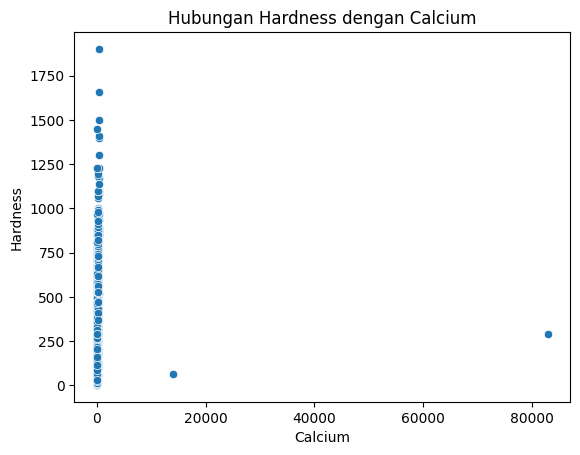

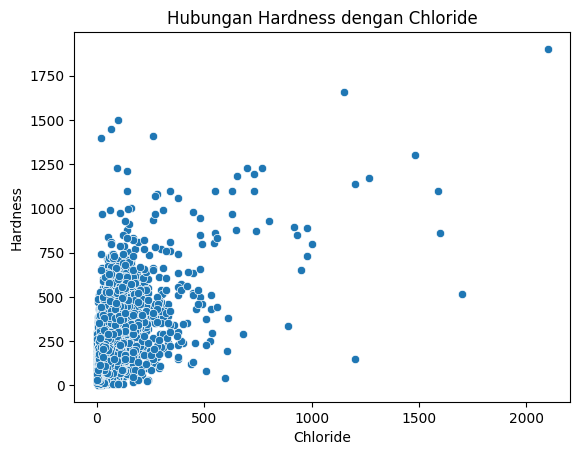

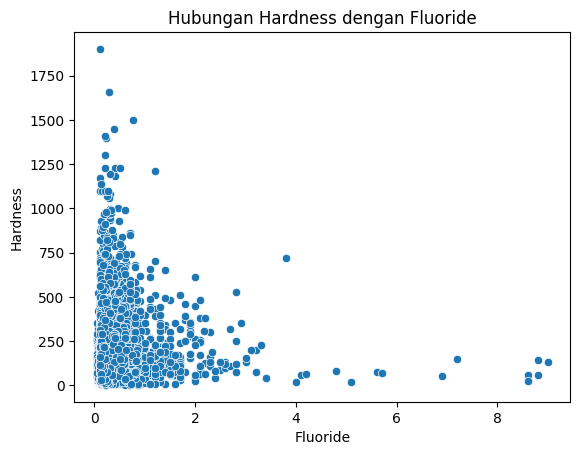

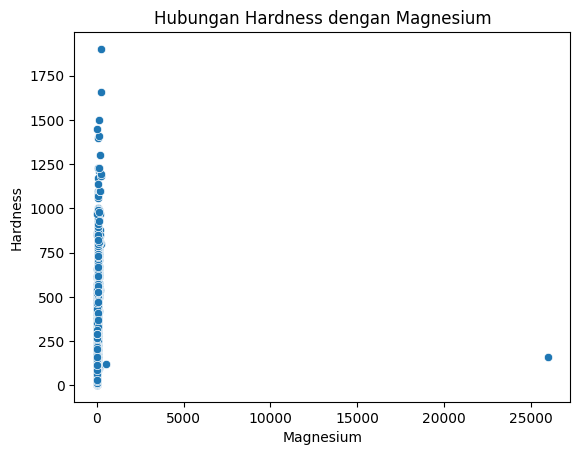

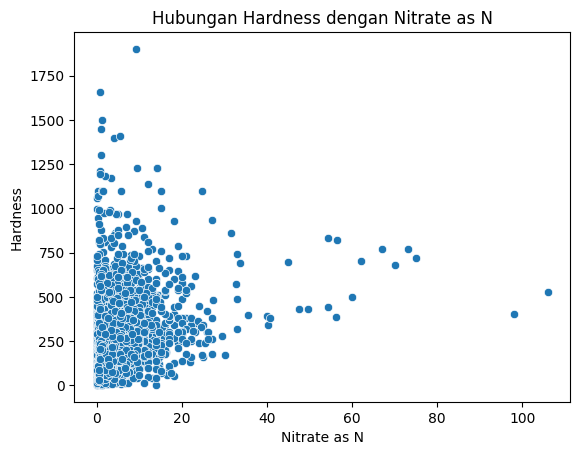

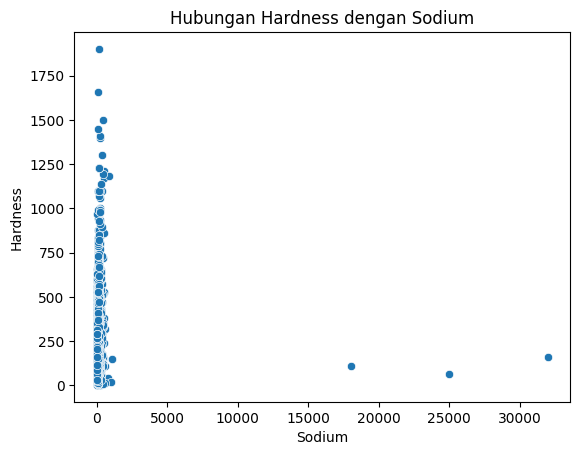

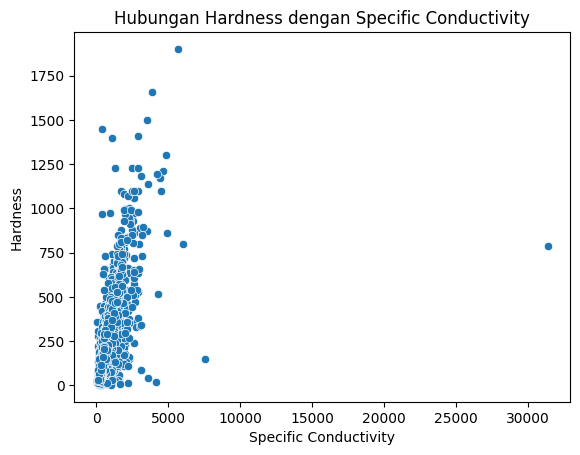

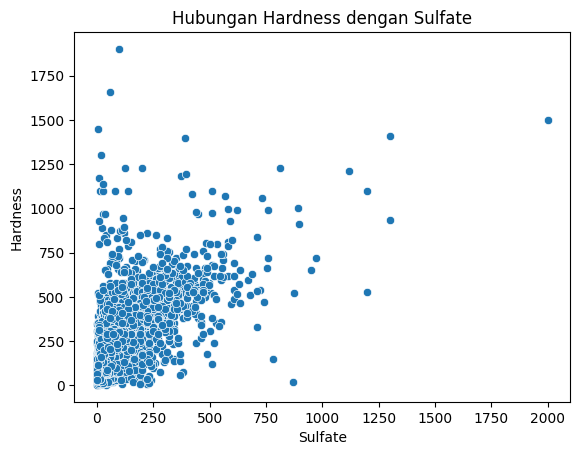

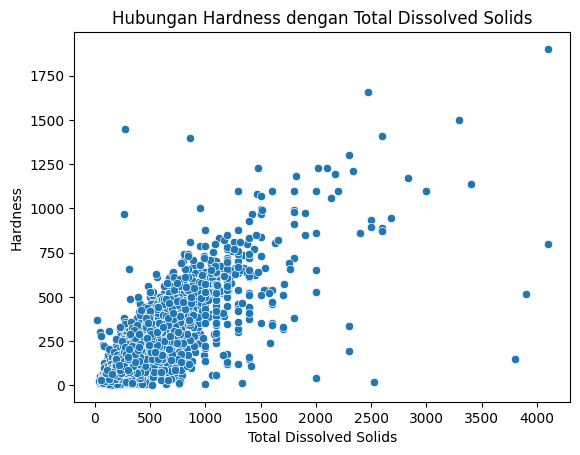

In [12]:
# Hubungan antara Hardness dan variabel numerik lainnya
for col in train.columns:
    if col != 'Hardness' and train[col].dtype != 'object' :
        sns.scatterplot(x=col, y='Hardness', data=train)
        plt.xlabel(col)
        plt.ylabel('Hardness')
        plt.title(f'Hubungan Hardness dengan {col}')
        plt.show()

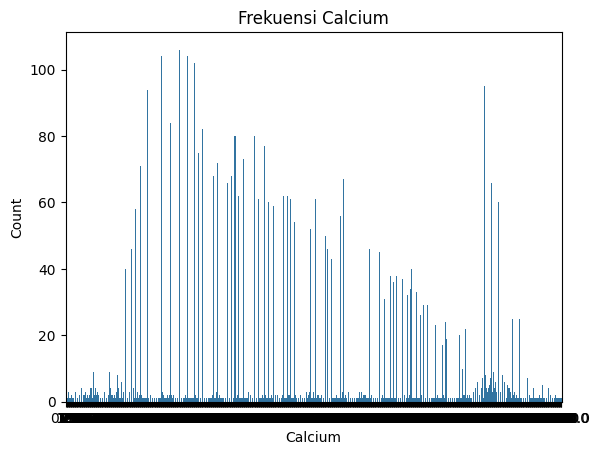

In [13]:
# Analisis frekuensi dan visualisasi untuk variabel kategorial
col_categorial = 'Calcium'

# Hitung frekuensi kategori
train[col_categorial].value_counts()

# Visualisasi frekuensi
sns.countplot(x=col_categorial, data=train)
plt.xlabel(col_categorial)
plt.ylabel('Count')
plt.title(f'Frekuensi {col_categorial}')
plt.show()

In [14]:
# Identifikasi outlier pada variabel numerik (Alkalinity)
col_numeric =  'Alkalinity, total'

# Hitung IQR (Interquartile Range)
Q1 = train[col_numeric].quantile(0.25)
Q3 = train[col_numeric].quantile(0.75)
IQR = Q3 - Q1

# Batas antar bawah dan atas
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identifikasi outlier 
outliers = train[(train[col_numeric] > upper_bound) | (train[col_numeric] < lower_bound)]

# Cetak jumlah outlier
print(f'Jumlah outlier pada {col_numeric}: {len(outliers)}')

# Hapus outlier
print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')

Jumlah outlier pada Alkalinity, total: 174
Lower bound: -38.5, Upper bound: 357.5


In [15]:
# Menghitung persentil 75 untuk kolom 'Sodium'
percentile_75_sodium = train['Sodium'].quantile(0.75)

# Menghitung rata-rata untuk kolom 'Alkalinity, total'
mean_alkalinity = train['Alkalinity, total'].mean()

# Memfilter data untuk mendapatkan baris yang memiliki kadar 'Sodium' di atas persentil 75 dan tingkat kebasaan (Alkalinity) di atas rata-rata
filtered_data = train[(train['Sodium'] > percentile_75_sodium) & (train['Alkalinity, total'] > mean_alkalinity)]

# Menghitung rata-rata kolom 'Hardness' untuk baris yang memenuhi kedua kondisi
average_hardness = filtered_data['Hardness'].mean()

print(f"Rata-rata 'Hardness' untuk sumber air dengan 'Sodium' di atas persentil 75 dan 'Alkalinity' di atas rata-rata: {average_hardness:.2f}")

Rata-rata 'Hardness' untuk sumber air dengan 'Sodium' di atas persentil 75 dan 'Alkalinity' di atas rata-rata: 383.08


In [16]:
train_drop = train.drop(['id'], axis=1)

# Inisialisasi DataFrame yang dibersihkan
df_cleaned_iqr = train_drop.copy()

numerical_columns = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']

# Inisialisasi dictionary untuk menyimpan jumlah outlier
outlier_counts_iqr = {}
outlier_counts_std = {}

# Loop melalui setiap kolom numerik
for col in numerical_columns:
    # Menggunakan IQR
    Q1 = df_cleaned_iqr[col].quantile(0.25)
    Q3 = df_cleaned_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    df_outliers_iqr = df_cleaned_iqr[(df_cleaned_iqr[col] < lower_bound_iqr) | (df_cleaned_iqr[col] > upper_bound_iqr)]
    train_iqr = df_cleaned_iqr[(df_cleaned_iqr[col] > lower_bound_iqr) & (df_cleaned_iqr[col] < upper_bound_iqr)]
    outlier_counts_iqr[col] = len(df_outliers_iqr)

    # Menggunakan standar deviasi
    mean = df_cleaned_iqr[col].mean()
    std = df_cleaned_iqr[col].std()
    lower_bound_std = mean - 3 * std
    upper_bound_std = mean + 3 * std
    df_outliers_std = df_cleaned_iqr[(df_cleaned_iqr[col] < lower_bound_std) | (df_cleaned_iqr[col] > upper_bound_std)]
    train_std = df_cleaned_iqr[(df_cleaned_iqr[col] > lower_bound_std) & (df_cleaned_iqr[col] < upper_bound_std)]
    outlier_counts_std[col] = len(df_outliers_std)

# Cetak jumlah outlier untuk setiap kolom numerik
print("Perbandingan jumlah outlier:")
for col in numerical_columns:
    print(f'{col}: IQR = {outlier_counts_iqr[col]}, Std Dev = {outlier_counts_std[col]}')




Perbandingan jumlah outlier:
Alkalinity, total: IQR = 174, Std Dev = 74
Calcium: IQR = 196, Std Dev = 2
Chloride: IQR = 463, Std Dev = 86
Fluoride: IQR = 425, Std Dev = 93
Magnesium: IQR = 380, Std Dev = 1
Nitrate as N: IQR = 378, Std Dev = 86
Sodium: IQR = 492, Std Dev = 3
Specific Conductivity: IQR = 278, Std Dev = 58
Sulfate: IQR = 567, Std Dev = 143
Total Dissolved Solids: IQR = 354, Std Dev = 102


In [17]:
# Skalarkan fitur numerik
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Skalarkan fitur numerik
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_cleaned_iqr[numerical_columns])

# Buat DataFrame dari hasil scaling
train_scaled_df = pd.DataFrame(train_scaled, columns=numerical_columns)

# Gabungkan data yang diskalakan dengan kolom 'id' dan 'Hardness'
train_prepared = pd.concat([train[['id']].loc[df_cleaned_iqr.index].reset_index(drop=True), train_scaled_df, train[['Hardness']].loc[df_cleaned_iqr.index].reset_index(drop=True)], axis=1)

# Pisahkan data ke dalam set pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(train_prepared[numerical_columns], train_prepared['Hardness'], test_size=0.2, random_state=42)

3. Data Preparation

In [18]:
# # Skalarkan fitur numerik
# from sklearn.preprocessing import StandardScaler

# # Inisialisasi Scaler
# scaler = StandardScaler()

# # Skalakan fitur numerik
# train_scaled = scaler.fit_transform(train[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']])

# # Gabungkan data yang diskalakan dengan data non-numerik
# train_prepared = pd.DataFrame(data={'id': train['id'], 'Alkalinity, total': train_scaled[:, 0], 'Calcium': train_scaled[:, 1], 'Chloride': train_scaled[:, 2], 'Fluoride': train_scaled[:, 3], 'Magnesium': train_scaled[:, 4], 'Nitrate as N': train_scaled[:, 5], 'Sodium': train_scaled[:, 6], 'Specific Conductivity': train_scaled[:, 7], 'Sulfate': train_scaled[:, 8], 'Total Dissolved Solids': train_scaled[:, 9], 'Hardness': train['Hardness']})

# # Pemisahan data latihan dan validasi
# from sklearn.model_selection import train_test_split

# # Pisahkan data ke dalam set pelatihan dan validasi
# X_train, X_val, y_train, y_val = train_test_split(train_prepared[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']], train_prepared['Hardness'], test_size=0.2, random_state=42)


4. Model Selection

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Memuat data latihan dan validasi yang telah disiapkan 
X_train, X_val, y_train, y_val = train_test_split(train_prepared[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']], train_prepared['Hardness'], test_size=0.2, random_state=42)

# Memilih model regresi
model = LinearRegression()

# Melatih model pada data latihan
model.fit(X_train, y_train)

# Prediksi data pada data_validasi
y_pred = model.predict(X_val)

# Evaluasi performa model
mse = mean_squared_error(y_val,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R^2): {r2:.3f}")


Mean Squared Error (MSE): 11159609.764
Root Mean Squared Error (RMSE): 3340.600
R-squared (R^2): -405.039


In [20]:
# Mencoba menggunakan dan membandingkan model regresi lain

# Melatih dan mengevaluasi model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_val, y_pred_lr)

print("Hasil Linear Regression:")
print(f"MSE: {mse_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R^2: {r2_lr:.3f}")

# Melatih dan mengevaluasi model Ridge Regression
alpha = 1.0  # Hyperparameter untuk Ridge Regression
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print("\nHasil Ridge Regression:")
print(f"MSE: {mse_ridge:.3f}")
print(f"RMSE: {rmse_ridge:.3f}")
print(f"R^2: {r2_ridge:.3f}")

# Melatih dan mengevaluasi model Lasso Regression
alpha = 1.0  # Hyperparameter untuk Lasso Regression
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_val)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("\nHasil Lasso Regression:")
print(f"MSE: {mse_lasso:.3f}")
print(f"RMSE: {rmse_lasso:.3f}")
print(f"R^2: {r2_lasso:.3f}")



Hasil Linear Regression:
MSE: 11159609.764
RMSE: 3340.600
R^2: -405.039

Hasil Ridge Regression:
MSE: 8203784.082
RMSE: 2864.225
R^2: -297.492

Hasil Lasso Regression:
MSE: 1145578.729
RMSE: 1070.317
R^2: -40.682


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X_train, X_val, y_train, y_val = train_test_split(train_prepared[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']], train_prepared['Hardness'], test_size=0.2, random_state=42)

# Model yang akan dibandingkan
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(max_depth=5, min_samples_leaf=2),
    RandomForestRegressor(n_estimators=100, max_depth=5)
]

# Menyimpan hasil evaluasi model
results = []

# Melatih dan mengevaluasi setiap model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nMelatih model {model_name}:")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2: {r2:.3f}")

    results.append([model_name, mse, rmse, r2])

# Menampilkan tabel perbandingan hasil
print("\nPerbandingan Hasil Model:")
print("{:<20} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R^2"))
for row in results:
    print("{:<20} {:<10.3f} {:<10.3f} {:<10.3f}".format(*row))

# Memilih model terbaik berdasarkan R^2
best_model_idx = results.index(max(results, key=lambda x: x[3]))
best_model_name = results[best_model_idx][0]
print("\nModel terbaik berdasarkan R^2:", best_model_name)


Melatih model LinearRegression:
MSE: 11159609.764
RMSE: 3340.600
R^2: -405.039

Melatih model Ridge:
MSE: 8203784.082
RMSE: 2864.225
R^2: -297.492

Melatih model Lasso:
MSE: 1145578.729
RMSE: 1070.317
R^2: -40.682

Melatih model DecisionTreeRegressor:
MSE: 3648.808
RMSE: 60.405
R^2: 0.867

Melatih model RandomForestRegressor:
MSE: 2646.999
RMSE: 51.449
R^2: 0.904

Perbandingan Hasil Model:
Model                MSE        RMSE       R^2       
LinearRegression     11159609.764 3340.600   -405.039  
Ridge                8203784.082 2864.225   -297.492  
Lasso                1145578.729 1070.317   -40.682   
DecisionTreeRegressor 3648.808   60.405     0.867     
RandomForestRegressor 2646.999   51.449     0.904     

Model terbaik berdasarkan R^2: RandomForestRegressor


5. Data Training and Evaluation

In [22]:
# Memuat data latihan dan validasi yang telah disiapkan
X_train, X_val, y_train, y_val = train_test_split(train_prepared[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']], train_prepared['Hardness'], test_size=0.2, random_state=42)

# Memilih model terbaik berdasarkan langkah sebelumnya (misalnya: RandomForestRegressor)
best_model = RandomForestRegressor(n_estimators=100, max_depth=5)

# Melatih model terbaik pada seluruh data latihan
best_model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred = best_model.predict(X_val)

# Evaluasi performa model terbaik
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"\nHasil performa model terbaik ({best_model.__class__.__name__}) pada data validasi:")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")



Hasil performa model terbaik (RandomForestRegressor) pada data validasi:
MSE: 2724.457
RMSE: 52.196
R^2: 0.901


6. Fine-tuning and Model Optimization

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Memuat data latihan
data_latih = pd.read_csv('train.csv')

# Persiapan Data
# ...

# Pemisahan data latihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(data_latih[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']], data_latih['Hardness'], test_size=0.2, random_state=42)

# Memilih model
model = RandomForestRegressor()

# Hyperparameter yang ingin dioptimasi
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 4, 8],
#     'min_samples_leaf': [1, 2, 4]
# }


# GridSearchCV untuk optimasi hyperparameter
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, refit=True)

# Melatih model dengan hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Hasil optimasi
print(f"Hasil optimasi hyperparameter:")
print(grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.3f}")

# Model terbaik dengan hyperparameter optimal
best_model = grid_search.best_estimator_

# Prediksi pada data validasi
y_pred = best_model.predict(X_val)

# Evaluasi performa model terbaik
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"\nHasil performa model terbaik ({best_model.__class__.__name__}) pada data validasi:")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2: {r2:.3f}")

Hasil optimasi hyperparameter:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -2383.929

Hasil performa model terbaik (RandomForestRegressor) pada data validasi:
MSE: 2213.702
RMSE: 47.050
R^2: 0.919


7. Datatest Prediction

In [24]:
# Prediksi pada data tes
X_tes = test[['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids']]
y_pred_tes = best_model.predict(X_tes)

# Menyimpan hasil prediksi
test['Hardness'] = y_pred_tes
test.to_csv('prediksi_tes.csv', index=False)

8. Result Interpretation and Model Evaluation

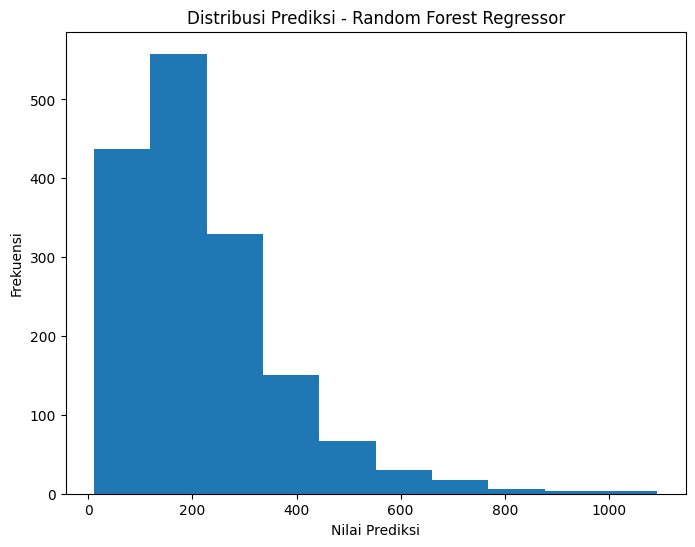

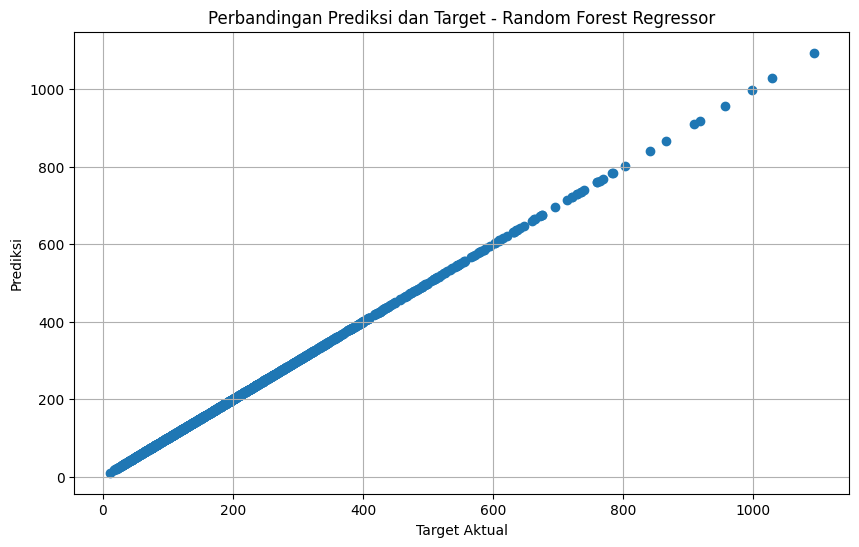

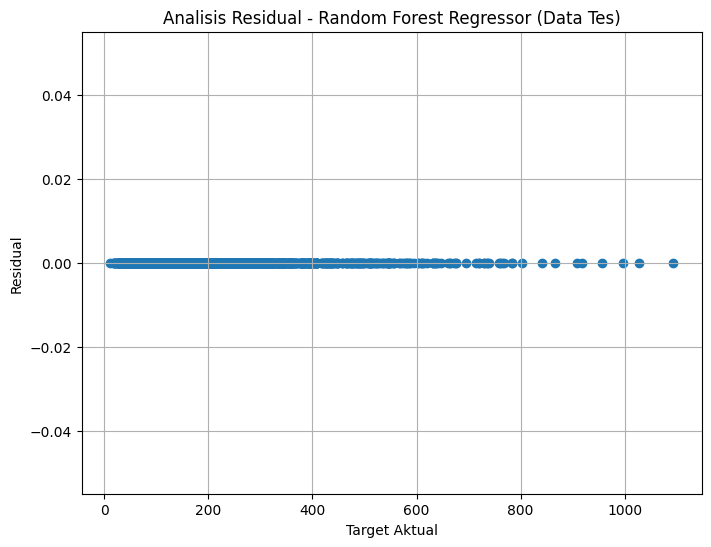

In [25]:
import matplotlib.pyplot as plt

# Analisis distribusi prediksi
plt.figure(figsize=(8, 6))
plt.hist(y_pred_tes)  # Use plt.hist instead of y_pred_tes.hist()
plt.xlabel('Nilai Prediksi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Prediksi - Random Forest Regressor')
plt.show()

# Analisis perbandingan prediksi dan target
plt.figure(figsize=(10, 6))
plt.scatter(test['Hardness'], y_pred_tes)
plt.xlabel('Target Aktual')
plt.ylabel('Prediksi')
plt.title('Perbandingan Prediksi dan Target - Random Forest Regressor')
plt.grid(True)
plt.show()

# Analisis residual pada data tes
plt.figure(figsize=(8, 6))
plt.scatter(test['Hardness'], y_pred_tes - test['Hardness'])
plt.xlabel('Target Aktual')
plt.ylabel('Residual')
plt.title('Analisis Residual - Random Forest Regressor (Data Tes)')
plt.grid(True)
plt.show()

Final

In [27]:
df_prediksi = pd.read_csv('prediksi_tes.csv')

df_filtered = df_prediksi[['id', 'Hardness']]
df_filtered.to_csv('prediksi_submission.csv', index=False)
print("CSV file 'prediksi_submission.csv' created successfully.")

CSV file 'prediksi_submission.csv' created successfully.
